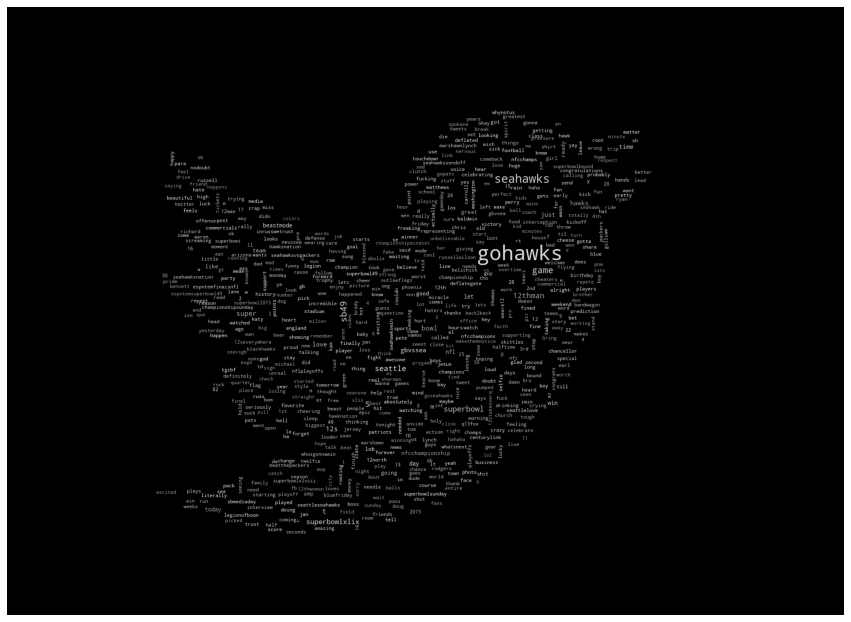

[('gohawks', 171263), ('seahawks', 27006), ('s', 20035), ('sb49', 15935), ('game', 15011), ('superbowl', 12111), ('t', 10330), ('seattle', 9937), ('12thman', 9485), ('superbowlxlix', 8524)]


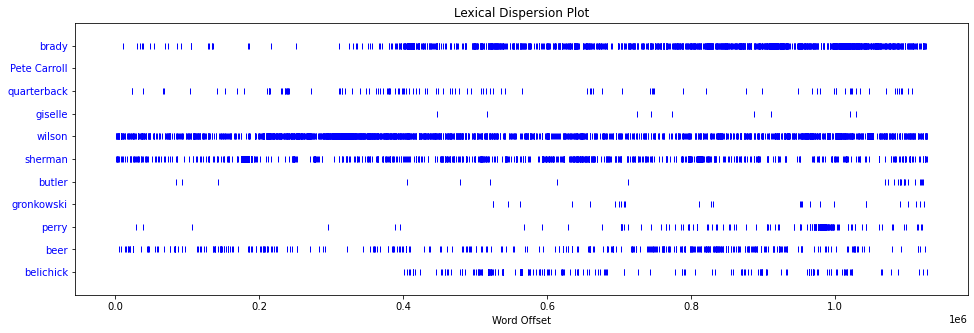

In [1]:
# coding: utf-8
# Question 16 Project

############# Import relevant packages ###############
from wordcloud import WordCloud
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
#from scipy.misc import imread
from matplotlib.pyplot import imread
#from scipy.misc.pilutil import imread
import random
import pandas as pd
import numpy as np
import re, json, datetime, pytz
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from collections import Counter
import nltk
############# Import relevant packages ###############


################ Get relevant data #########################
def get_data(text,return_day_count=False,return_hour_count=False):
    with open(text, 'r',encoding="utf8") as f:
        retweet_count,month,day,hour,followers,place,title,time = [],[],[],[],[],[],[], []
        pst_tz = pytz.timezone('US/Pacific') 
        for line in f:
            tweet = json.loads(line)
            retweet_count.append(tweet['metrics']['citations']['total']) 
            month.append(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).month)
            day.append(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).day)
            hour.append(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).hour)
            followers.append(tweet['author']['followers'])
            time.append(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz))
            place.append(tweet['tweet']['user']['location'])
            title.append(tweet['title'])
    d = {'retweet_count':retweet_count,'month':month,'day':day,'hour':hour,
    'followers':followers,'time':time,'place':place,'title':title}
    df = pd.DataFrame(d)
    day_count = np.array(month)*31 + np.array(day) - 44
    hour_count = (day_count-1)*24 + np.array(hour)
    if return_day_count:
        df['day_count'] = day_count
    if return_hour_count:
        df['hour_count'] = hour_count
    return df   
################ Get relevant data #########################

#################################################################################
#Problem 15 (Wordcloud)
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

#logomask = imread('C:/Users/madhu.kolli/Desktop/ECE 219/Project 5 Twitter/twitter.png')
logomask = imread('C:/Users/ericz/OneDrive/桌面/UCLA_Winter/ECE219/Project4/twitter.jpg')
fontcolor='#fafafa'
bgcolor = '#000000'

def full_clean(tweets):
    from sklearn.feature_extraction import text
    stop_words = text.ENGLISH_STOP_WORDS
    corpus = []
    for tweet in tweets:
        clean_tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).lower().split()
        text = [word for word in clean_tweet if not word in stop_words]
        text = ' '.join(text)
        corpus.append(text)
    return corpus
    
def get_wordcloud(text):
    df = get_data(text)
    tweets = df['title'].tolist()
    cleaned_tweets = full_clean(tweets)
    full_text = ' '.join(cleaned_tweets)
    cleaned_tweets = full_text.split()
    wordcloud = WordCloud(background_color='black',max_font_size=50,
                          mask = logomask,
                          max_words=700,
                          width=1800,
                          height=1400).generate_from_frequencies(Counter(cleaned_tweets))
        
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
    plt.axis('off')
    plt.show()
   
    counts=Counter(cleaned_tweets)
    most_occur = counts.most_common(10)
    print(most_occur)
    
    # do the work; create a dispersion chart of the MAXIMUM most frequent pos words
    plt.figure(figsize=(16,5))
    topics = ['brady', 'Pete Carroll', 'quarterback','giselle','wilson','sherman','butler','gronkowski','perry','beer','belichick']
    myText = nltk.Text(cleaned_tweets)
    myText.dispersion_plot(topics)

#get_wordcloud('tweets_#gopatriots')
get_wordcloud('tweets_data/tweets_#gohawks.txt')
# get_wordcloud('tweets_#gohawks') 
# get_wordcloud('tweets_#sb49')
#get_wordcloud('tweets_#superbowl')
#get_wordcloud('tweets_#nfl')
#get_wordcloud('tweets_#patriots')
#get_wordcloud('tweets_#combine')
#################################################################################


In [2]:
#pip install -U textblob